**House price prediction**


The problem statement is to predict the property price which will helps to overall market condition and the economic health of a country.

Attributes of the dataset:
1.   POSTED_BY: Who has posted the property
2.   UNDER_CONSTRUCTION: Whether the property is under     construction or not
1.   RERA: Real Estate Regulatory Authority, stands for   transparency in the real estate industry. It was brought to action to eradicate the existing discrepancies and problems within the sector.
2.   BHK_NO: number of rooms in the house
1.   BHK_OR_RK: type of the Property whether it BHK or RK
2.   SQUARE_FT: Size of the property in square feet
1.   READY_TO_MOVE: This is the property which is ready for sale/move or not 
2.   RESALE: Property which are resaled
1.   ADDRESS: Physical location of the property
2.   LONGITUDE: Longitude is the measurement east or west of the prime meridian. Longitude is measured by imaginary lines that run around Earth vertically (up and down) and meet at the North and South Poles. These lines are known as meridians. Each meridian measures one arc degree of longitude.
1.   LATITUDE: Latitude is the measurement of distance north or south of the Equator. It is measured with 180 imaginary lines that form circles around Earth east-west, parallel to the Equator. These lines are known as parallels. A circle of latitude is an imaginary ring linking all points sharing a parallel.
2.   TARGET(PRICE_IN_LACS): Price of the property in lakhs















In [1]:
# importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Importing the datasets**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(5)# prints the first five rows of the train dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
test.head(5)# prints the first five rows of the test dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
# Check for shape of both datasets 
print(train.shape)
print(   )
print(test.shape)

(29451, 12)

(68720, 11)


In [6]:
train.tail(5) # prints last five rows of a train dataset along with all columns 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [7]:
test.tail(5) # prints last five rows of a test dataset along with all columns 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670
68719,Dealer,0,0,3,BHK,2439.532944,1,1,"Hiranandani Gardens - Powai,Mumbai",19.124896,72.893503


**Printing the non-null values present in the columns**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


**Checking for the missing values**

In [10]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [11]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

It can be observe that there is no missing values in the both files 

In [12]:
train.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [13]:
test.nunique()

POSTED_BY                 3
UNDER_CONSTRUCTION        2
RERA                      2
BHK_NO.                  17
BHK_OR_RK                 2
SQUARE_FT             37704
READY_TO_MOVE             2
RESALE                    2
ADDRESS               11048
LONGITUDE              5907
LATITUDE               5914
dtype: int64

**Checking for the duplicated values in the dataset and drop the duplicated values if present**

In [14]:
train[train.duplicated()] # it selects the duplicated values in train dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [15]:
test[test.duplicated()] # it selects the duplicated values in test dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
150,Owner,0,0,2,BHK,1304.347826,1,1,"Sector 88 Faridabad,Faridabad",28.431862,77.351104
631,Dealer,0,1,2,BHK,820.232399,1,1,"Pholriwal,Jalandhar",31.261414,75.589997
1165,Dealer,0,1,2,BHK,1250.000000,1,1,"Banashankari Stage V,Bangalore",12.922300,77.553200
1457,Dealer,0,1,3,BHK,1724.137931,1,1,"Kundalahalli,Bangalore",12.970450,77.712284
1897,Owner,1,1,2,BHK,1250.000000,0,1,"Milakpur Goojar,Bhiwadi",28.194910,76.826552
...,...,...,...,...,...,...,...,...,...,...,...
68626,Dealer,0,0,4,BHK,2050.345108,1,1,"Sector-15 Bahadurgarh,Bahadurgarh",30.752321,76.772816
68662,Owner,0,0,2,BHK,1045.068583,1,1,"Sector-137 Noida,Noida",28.506454,77.409568
68685,Dealer,0,1,2,BHK,341.933478,1,0,"Purseni,Lucknow",26.707154,80.982346
68698,Dealer,1,1,3,BHK,1284.615385,0,0,"Sector-150 Noida,Noida",28.429614,77.481711


In [16]:
# Check for shape of both datasets after droping the duplicated values 
print(train.shape)
print(   )
print(test.shape)

(29451, 12)

(68720, 11)


**visualization**

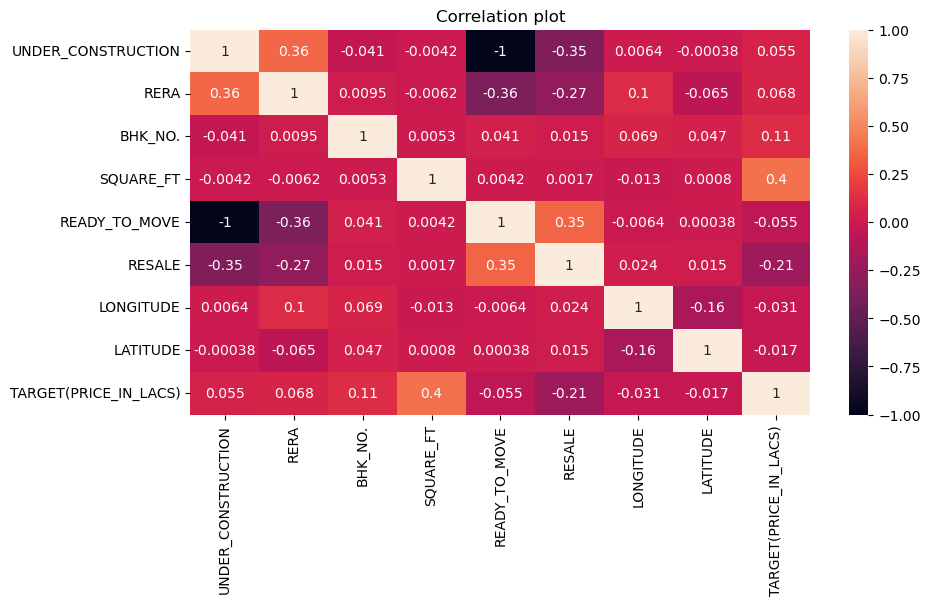

In [17]:
# checking the correlation between the features of the train dataframe by ploting heatmap correlation
train_corr = train.corr() # finding the correlation of the each columns in the train dataframe, the correlation matrix to be visualized
plt.figure(figsize=(10,5)) # specify the width and height of the plot
trainplot = sns.heatmap(train_corr, annot=True,) # create a heatmap plot of a correlation matrix called "train_corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

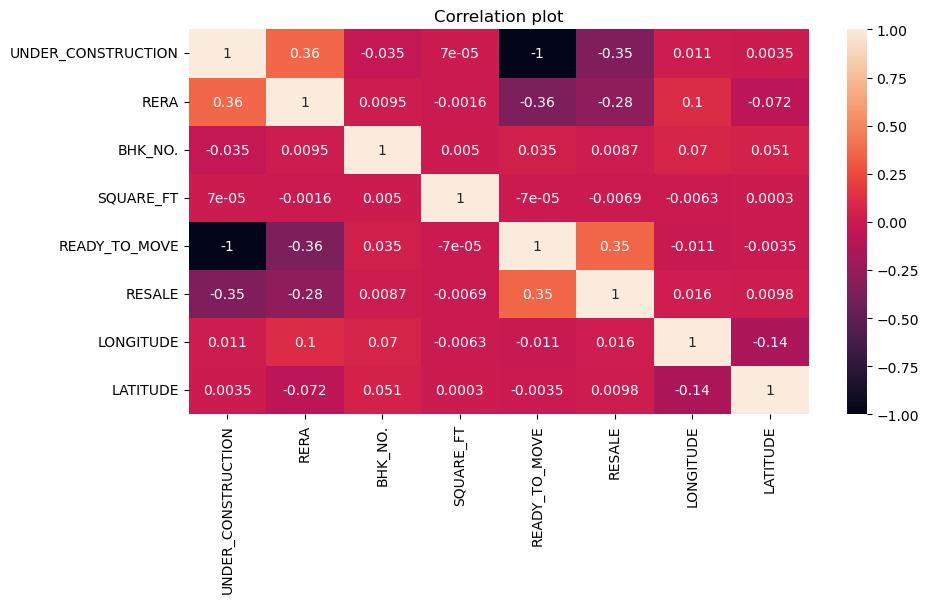

In [18]:
# checking the correlation between the features of the train dataframe by ploting heatmap correlation
test_corr = test.corr() # finding the correlation of the each columns in the train dataframe, the correlation matrix to be visualized
plt.figure(figsize=(10,5)) # specify the width and height of the plot
testplot = sns.heatmap(test_corr, annot=True,) # create a heatmap plot of a correlation matrix called "train_corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

From the plot it can be observe the address does'nt have correlation between the features, so we can remove the address column.

In [19]:
train.drop(['ADDRESS'], axis=1, inplace=True) # droping the address column 
test.drop(['ADDRESS'], axis=1, inplace=True) 

In [20]:
print(train.shape)
print(   )
print(test.shape)

(29451, 11)

(68720, 10)


**Converting categorical values to numerical values**

In [21]:
train.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [22]:
# converting categorical values to numerical values 
train = pd.get_dummies(data=train, columns=['POSTED_BY', 'BHK_OR_RK'], drop_first=True)
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0,0


In [23]:
train.dtypes

UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
POSTED_BY_Dealer           uint8
POSTED_BY_Owner            uint8
BHK_OR_RK_RK               uint8
dtype: object

In [24]:
train.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'BHK_OR_RK_RK'],
      dtype='object')

In [25]:
  test.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK              object
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [26]:
test = pd.get_dummies(data=test, columns=['POSTED_BY', 'BHK_OR_RK'], drop_first=True)
test.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,1,545.171340,1,1,21.262000,73.047700,0,1,0
1,1,1,2,800.000000,0,0,18.966114,73.148278,1,0,0
2,0,0,2,1257.096513,1,1,22.592200,88.484911,1,0,0
3,0,0,3,1400.329489,1,1,26.988300,75.584600,1,0,0
4,0,0,1,430.477830,1,1,22.700000,72.870000,0,1,0


In [27]:
test.dtypes

UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
LONGITUDE             float64
LATITUDE              float64
POSTED_BY_Dealer        uint8
POSTED_BY_Owner         uint8
BHK_OR_RK_RK            uint8
dtype: object

In [28]:
print(train.shape)
print(   )
print(test.shape)

(29451, 12)

(68720, 11)


In [29]:
train.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)',
       'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'BHK_OR_RK_RK'],
      dtype='object')

**Spliting the dataset to train**

In [30]:
X = train.drop('TARGET(PRICE_IN_LACS)', axis=True)
X.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1,0,0


In [31]:
Y = train['TARGET(PRICE_IN_LACS)']
Y.head(5)

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [32]:
print(X.shape)
print(Y.shape)

(29451, 11)
(29451,)


In [33]:
test.shape

(68720, 11)

In [34]:
# splitting into x_train, y_train, x_test, y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [35]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(23560, 11)
(23560,)
(5891, 11)
(5891,)


**Model building**

In [36]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [37]:
y_pred = rfr.predict(X_test)
y_pred

array([ 64.025, 112.026,  36.63 , ...,  70.993, 149.03 ,  32.188])

In [38]:
print('MAE:', mean_absolute_error(Y_test, y_pred))
print('MSE:', mean_squared_error(Y_test, y_pred))

MAE: 34.960361090274326
MSE: 140446.18234701458


In [39]:
r2 = r2_score(Y_test, y_pred)
r2

0.7422377346686303

### Prediction test dataset

In [40]:
y_test_pred=rfr.predict(test)
y_test_pred

array([  20.386     ,   77.804     ,   69.085     , ..., 8227.3       ,
         90.531     ,  620.46666667])

## Pickling the model file for deployment

In [41]:
import pickle # it will helps to pickling of the regression model

pickle file will stores the all the information regarding the model in a serialized format and then load the pickle file and do the prediction  

In [42]:
# converting to pickle file 
pickle.dump(rfr, open('rfr.pkl','wb')) # rfr.pkl is file name which is created by open function and with write byte mode. 

In [43]:
# load the pickle file 
pickled_model=pickle.load(open('rfr.pkl','rb')) # rb = read byte mode

In [44]:
# prediction 
pickled_model.predict(X_test)

array([ 64.025, 112.026,  36.63 , ...,  70.993, 149.03 ,  32.188])